# TITANIC SURVIVAL PREDICTION USING NAIVE BAYES

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Uploading Dataset from local directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


### Load data

In [3]:
dataset = pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 12)

### Dropping Unwanted columns

In [5]:
dataset = dataset.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


### Mapping Text data to Binary value

In [6]:
dataset['Sex'] = dataset['Sex'].map({'female':0,'male':1}).astype(int)
dataset.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


### Segregate Data into INPUT X and OUTPUT Y

In [7]:
X = dataset.drop('Survived', axis='columns')
X

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [8]:
Y = dataset.Survived
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Finding and removing NA values from X

In [11]:
X.columns[X.isna().any()]


Index(['Age'], dtype='object')

In [12]:
X.Age = X.Age.fillna(X.Age.mean())

### Check again for NA values

In [14]:
X.columns[X.isna().any()]


Index([], dtype='object')

### Splitting Data

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

### Training

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

### Prediction of Data

In [17]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1])

### Accuracy of model

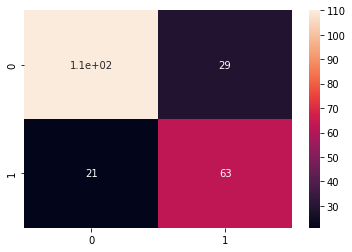

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm =confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [20]:
score = accuracy_score(y_test,y_pred)
print("Accuracy of the Model: {0}%".format(score*100))

Accuracy of the Model: 77.57847533632287%


### Predicting whether person survived or not

In [21]:
p_classno = int(input("Enter the p_classno :"))
gender = int(input("Enter the gender(Male=1 or Female=0) :"))
age = int(input("Enter the age :"))
fare = float(input("Enter the fare :"))
person = [[p_classno,gender,age,fare]]
result = model.predict(person)

if result==1:
  print("Person has Survived!!!")
else:
  print("Person has Not Survived!!!")

Enter the p_classno :3
Enter the gender(Male=1 or Female=0) :1
Enter the age :43
Enter the fare :67
Person has Not Survived!!!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
